In [1]:
library(ggplot2)
library(ggpubr)

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”


In [ ]:
df = data.frame()
for (ncell in c(200, 40, 8)){
    for (transf in c('clr', 'alr')){
        f = paste0('../test/mse_', ncell, '_40_200_', transf, '.csv')
        tmp = read.csv(f)
        tmp['ncell']  = ncell
        tmp['transf'] = transf
        df = rbind(df, tmp)
    }
}

In [15]:
cpalette = c("#CC6666", "#9999CC", "#66CC99", "#E69F00", "#56B4E9")

# Partial correlation

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


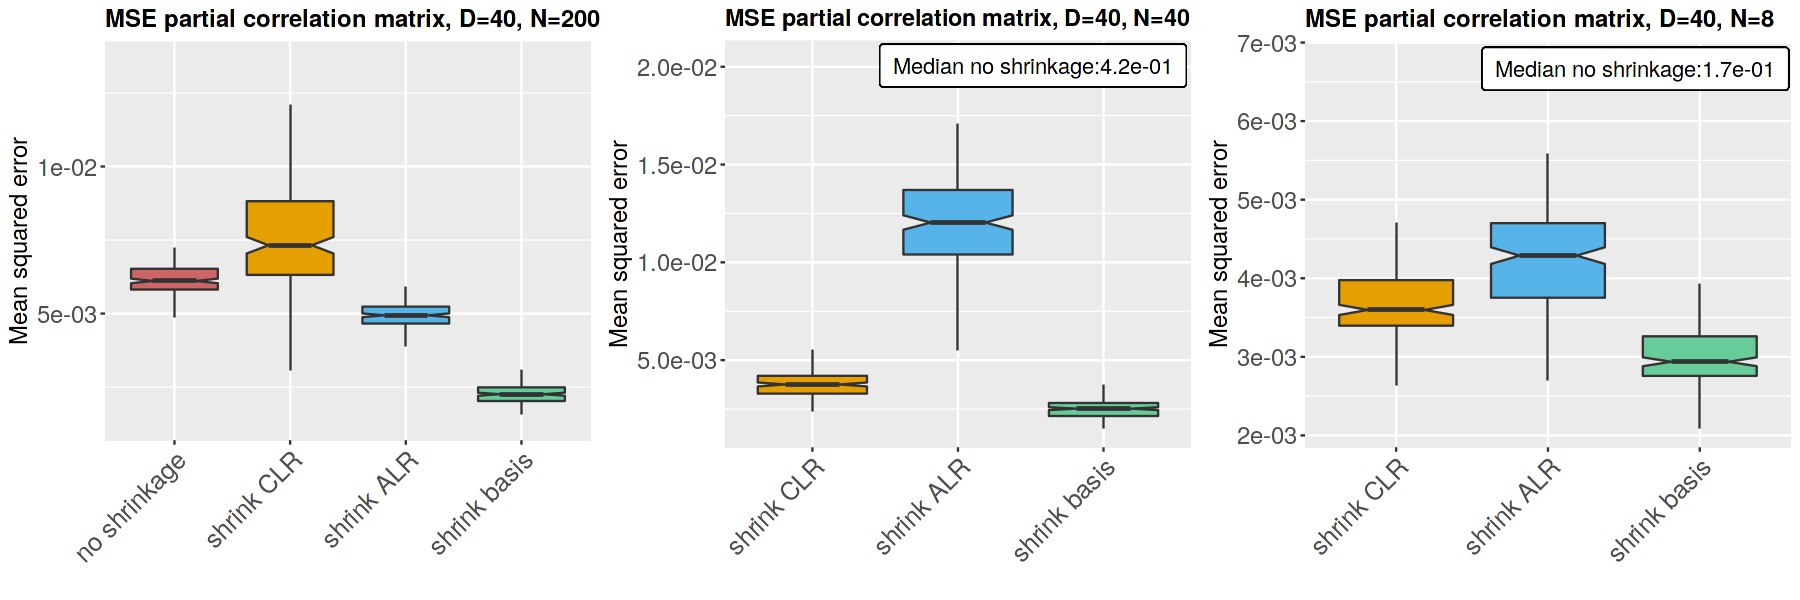

In [85]:
# organize data
tmp             = df[df$corr == 'partial correlation',]
pos             = which(tmp$shrink == 'shrink std' & tmp$transf == 'clr')
tmp$shrink[pos] = 'shrink CLR'
pos             = which(tmp$shrink == 'shrink std' & tmp$transf == 'alr')
tmp$shrink[pos] = 'shrink ALR'
for (i in c('no shrinkage', 'shrink basis')){
    pos = which(tmp$shrink == i & tmp$transf == 'alr')
    tmp = tmp[-pos,]
}
tmp$shrink = factor(tmp$shrink, levels=c('no shrinkage', 'shrink CLR', 'shrink ALR', 'shrink basis'))


# N=200
tmp1 = tmp[tmp$ncell == 200,]
tm = tmp1[tmp1$shrink == 'shrink CLR',]$mse
bp = as.numeric(quantile(tm)[4]) + IQR(tm)
g1 = ggplot(tmp1, aes(x=shrink, y=mse, fill=shrink)) + 
        geom_boxplot(outlier.shape = NA, notch = TRUE) +
        scale_y_continuous(labels = function(x) format(x, scientific = TRUE), limits=c(NA, bp*1.2)) +
        scale_fill_manual(values=cpalette[c(1,4,5,3)]) +
        xlab('') + 
        ylab('Mean squared error') +
        ggtitle('MSE partial correlation matrix, D=40, N=200') +
        theme(
            plot.title=element_text(face="bold", size=14), 
            axis.text.x = element_text(size=15, angle=45, hjust=1), 
            axis.text.y=element_text(size=14),
            axis.title.y=element_text(size=14)
        )
                           
# N=40
med21  = format(median(tmp[tmp$ncell == 40 & tmp$shrink == 'no shrinkage' & tmp$transf == 'clr',]$mse), scientific=T, digits=2)
tmp2 = tmp[tmp$ncell == 40 & tmp$shrink != 'no shrinkage',]
tm = tmp2[tmp2$shrink == 'shrink ALR',]$mse
bp = as.numeric(quantile(tm)[4]) + IQR(tm)
g2 = ggplot(tmp2, aes(x=shrink, y=mse, fill=shrink)) + 
        geom_boxplot(outlier.shape = NA, notch = TRUE) +
        scale_y_continuous(labels = function(x) format(x, scientific = TRUE), limits=c(NA, bp*1.2)) +
        scale_fill_manual(values=cpalette[c(4,5,3)]) +
        xlab('') + 
        ylab('Mean squared error') +
        ggtitle('MSE partial correlation matrix, D=40, N=40') +
        theme(
            plot.title=element_text(face="bold", size=13.7), 
            axis.text.x = element_text(size=15, angle=45, hjust=1), 
            axis.text.y=element_text(size=14),
            axis.title.y=element_text(size=14)
        ) +
        geom_label(
            label=paste0('Median no shrinkage:', med21), 
            x='shrink basis',
            y=bp*1.18,
            label.padding = unit(0.55, "lines"), # Rectangle size around label
            label.size = 0.3,
            size=4.5,
            color = "black",
            fill='white',
            hjust = 0.73
          )
                           
# N=8
med31  = format(median(tmp[tmp$ncell == 8 & tmp$shrink == 'no shrinkage' & tmp$transf == 'clr',]$mse), scientific=T, digits=2)
tmp3 = tmp[tmp$ncell == 8 & tmp$shrink != 'no shrinkage',]
tm = tmp3[tmp3$shrink == 'shrink ALR',]$mse
bp = as.numeric(quantile(tm)[4]) + IQR(tm)
g3 = ggplot(tmp3, aes(x=shrink, y=mse, fill=shrink)) + 
        geom_boxplot(outlier.shape = NA, notch = TRUE) +
        scale_y_continuous(labels = function(x) format(x, scientific = TRUE), limits=c(NA, bp*1.2)) +
        scale_fill_manual(values=cpalette[c(4,5,3)]) +
        xlab('') + 
        ylab('Mean squared error') +
        ggtitle('MSE partial correlation matrix, D=40, N=8') +
        theme(
            plot.title=element_text(face="bold", size=14), 
            axis.text.x = element_text(size=15, angle=45, hjust=1), 
            axis.text.y=element_text(size=14),
            axis.title.y=element_text(size=14)
        ) +
        geom_label(
            label=paste0('Median no shrinkage:', med31), 
            x='shrink basis',
            y=bp*1.18,
            label.padding = unit(0.55, "lines"), # Rectangle size around label
            label.size = 0.3,
            size=4.5,
            color = "black",
            fill='white',
            hjust = 0.71
          )
                           
# plot figure
options(repr.plot.width=15, repr.plot.height=5)                           
g = ggarrange(g1, g2, g3, nrow=1, ncol=3, legend='none')
g

# Covariance matrix

In [67]:
#######
# CLR #
#######

# organize data
tmp             = df[df$corr == 'covariance' & df$transf == 'clr',]
pos             = which(tmp$shrink == 'shrink std')
tmp$shrink[pos] = 'shrink CLR'
tmp$shrink      = factor(tmp$shrink, levels=c('no shrinkage', 'shrink CLR', 'shrink basis'))


# N=200
tmp1 = tmp[tmp$ncell == 200,]
tm   = tmp1[tmp1$shrink == 'no shrinkage',]$mse
bp   = as.numeric(quantile(tm)[4]) + IQR(tm)
g1_clr = ggplot(tmp1, aes(x=shrink, y=mse, fill=shrink)) + 
        geom_boxplot(outlier.shape = NA, notch = TRUE) +
        scale_y_continuous(labels = function(x) format(x, scientific = TRUE), limits=c(NA, bp*1.2)) +
        scale_fill_manual(values=cpalette) +
        xlab('') + 
        ylab('Mean squared error') +
        ggtitle('MSE covariance matrix (CLR), D=40, N=200') +
        theme(
            plot.title=element_text(face="bold", size=13), 
            axis.text.x = element_text(size=13),
            axis.text.y = element_text(size=13),
            axis.title.y = element_text(size=13)
        )
                           
# N=40
med2  = format(median(tmp[tmp$ncell == 40 & tmp$shrink == 'no shrinkage',]$mse), scientific=T, digits=2)
tmp2 = tmp[tmp$ncell == 40 & tmp$shrink != 'no shrinkage',]
tm   = tmp2[tmp2$shrink == 'shrink CLR',]$mse
bp   = as.numeric(quantile(tm)[4]) + IQR(tm)
g2_clr = ggplot(tmp2, aes(x=shrink, y=mse, fill=shrink)) + 
        geom_boxplot(outlier.shape = NA, notch = TRUE) +
        scale_y_continuous(labels = function(x) format(x, scientific = TRUE), limits=c(NA, bp*1.2)) +
        scale_fill_manual(values=cpalette[c(2,3)]) +
        xlab('') + 
        ylab('Mean squared error') +
        ggtitle('MSE covariance matrix (CLR), D=40, N=40') +
        theme(
            plot.title=element_text(face="bold", size=13), 
            axis.text.x = element_text(size=13),
            axis.text.y = element_text(size=13),
            axis.title.y = element_text(size=13)) +
        geom_label(
            label=paste0('Median no shrinkage:', med2), 
            x='shrink basis',
            y=bp*1.19,
            label.padding = unit(0.55, "lines"), # Rectangle size around label
            label.size = 0.3,
            size=4.2,
            color = "black",
            fill='white',
            hjust = 0.53
          )
                           
# N=8
med3  = format(median(tmp[tmp$ncell == 8 & tmp$shrink == 'no shrinkage',]$mse), scientific=T, digits=2)
tmp3 = tmp[tmp$ncell == 8 & tmp$shrink != 'no shrinkage',]
tm   = tmp3[tmp3$shrink == 'shrink CLR',]$mse
bp   = as.numeric(quantile(tm)[4]) + IQR(tm)
g3_clr = ggplot(tmp3, aes(x=shrink, y=mse, fill=shrink)) + 
        geom_boxplot(outlier.shape = NA, notch = TRUE) +
        scale_y_continuous(labels = function(x) format(x, scientific = TRUE), limits=c(NA, bp*1.2)) +
        scale_fill_manual(values=cpalette[c(2,3)]) +
        xlab('') + 
        ylab('Mean squared error') +
        ggtitle('MSE covariance matrix (CLR), D=40, N=8') +
        theme(
            plot.title=element_text(face="bold", size=13), 
            axis.text.x = element_text(size=13),
            axis.text.y = element_text(size=13),
            axis.title.y = element_text(size=13)
        ) +
        geom_label(
            label=paste0('Median no shrinkage:', med3), 
            x='shrink basis',
            y=bp*1.19,
            label.padding = unit(0.55, "lines"), # Rectangle size around label
            label.size = 0.3,
            size=4.2,
            color = "black",
            fill='white',
            hjust = 0.57
          )
                           

In [68]:
#######
# ALR #
#######

# organize data
tmp             = df[df$corr == 'covariance' & df$transf == 'alr',]
pos             = which(tmp$shrink == 'shrink std')
tmp$shrink[pos] = 'shrink ALR'
tmp$shrink      = factor(tmp$shrink, levels=c('no shrinkage', 'shrink ALR', 'shrink basis'))


# N=200
tmp1 = tmp[tmp$ncell == 200,]
tm   = tmp1[tmp1$shrink == 'no shrinkage',]$mse
bp   = as.numeric(quantile(tm)[4]) + IQR(tm)
g1_alr = ggplot(tmp1, aes(x=shrink, y=mse, fill=shrink)) + 
        geom_boxplot(outlier.shape = NA, notch = TRUE) +
        scale_y_continuous(labels = function(x) format(x, scientific = TRUE), limits=c(NA, bp*1.2)) +
        scale_fill_manual(values=cpalette) +
        xlab('') + 
        ylab('Mean squared error') +
        ggtitle('MSE covariance matrix (ALR), D=40, N=200') +
        theme(
            plot.title=element_text(face="bold", size=13), 
            axis.text.x = element_text(size=13),
            axis.text.y = element_text(size=13),
            axis.title.y = element_text(size=13)
        )
                           
# N=40
tmp2 = tmp[tmp$ncell == 40,]
tm   = tmp2[tmp2$shrink == 'no shrinkage',]$mse
bp   = as.numeric(quantile(tm)[4]) + IQR(tm)
g2_alr = ggplot(tmp2, aes(x=shrink, y=mse, fill=shrink)) + 
        geom_boxplot(outlier.shape = NA, notch = TRUE) +
        scale_y_continuous(labels = function(x) format(x, scientific = TRUE), limits=c(NA, bp*1.2)) +
        scale_fill_manual(values=cpalette) +
        xlab('') + 
        ylab('Mean squared error') +
        ggtitle('MSE covariance matrix (ALR), D=40, N=40') +
        theme(
            plot.title=element_text(face="bold", size=13), 
            axis.text.x = element_text(size=13),
            axis.text.y = element_text(size=13),
            axis.title.y = element_text(size=13)
        ) 
                           
# N=8
tmp3 = tmp[tmp$ncell == 8,]
tm   = tmp3[tmp3$shrink == 'no shrinkage',]$mse
bp   = as.numeric(quantile(tm)[4]) + IQR(tm)
g3_alr = ggplot(tmp3, aes(x=shrink, y=mse, fill=shrink)) + 
        geom_boxplot(outlier.shape = NA, notch = TRUE) +
        scale_y_continuous(labels = function(x) format(x, scientific = TRUE), limits=c(0,bp*1.2)) +
        scale_fill_manual(values=cpalette) +
        xlab('') + 
        ylab('Mean squared error') +
        ggtitle('MSE covariance matrix (ALR), D=40, N=8') +
        theme(
            plot.title=element_text(face="bold", size=13), 
            axis.text.x = element_text(size=13),
            axis.text.y = element_text(size=13),
            axis.title.y = element_text(size=13)
            ) 
                           

Warning message:
“Removed 48 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 31 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 10 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 26 rows containing non-finite values (stat_boxplot).”


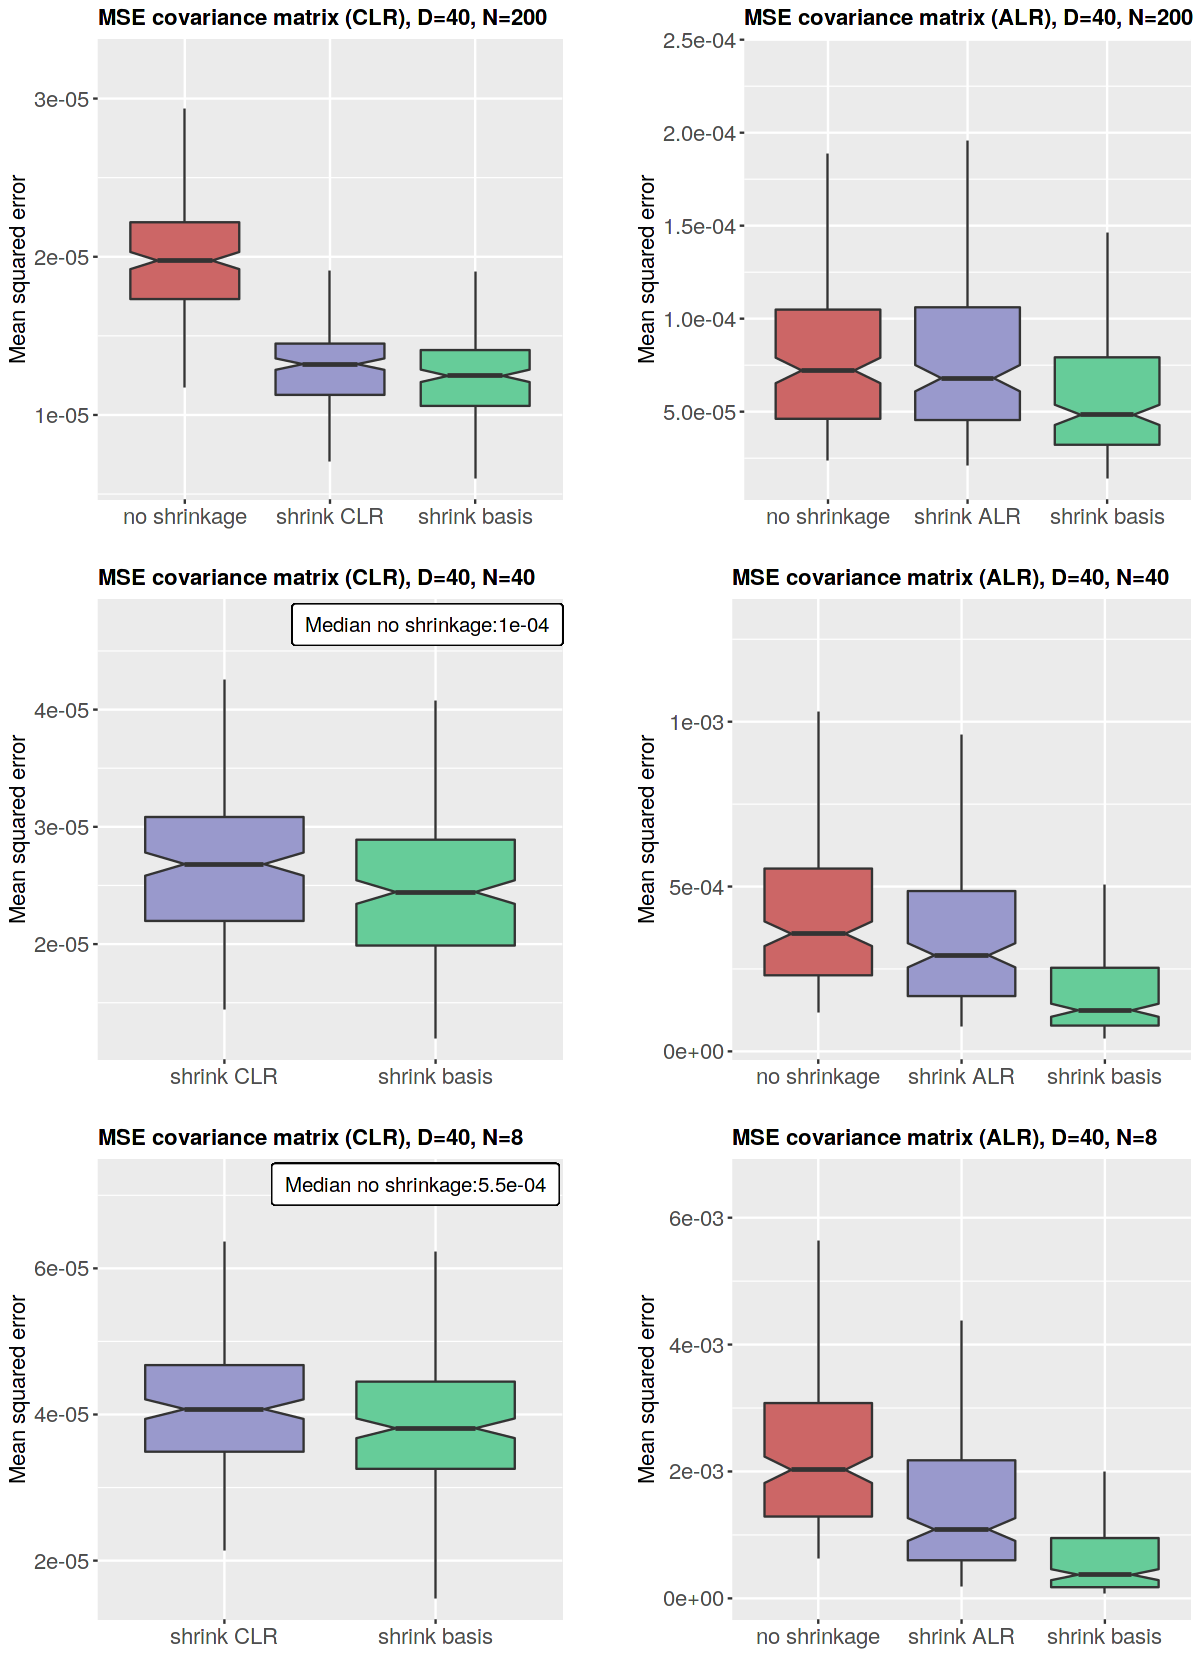

In [69]:
options(repr.plot.width=10, repr.plot.height=14)                           
g = ggarrange(
    g1_clr, NULL, g1_alr,
    g2_clr, NULL, g2_alr, 
    g3_clr, NULL, g3_alr,
    nrow=3, ncol=3, 
    legend='none',
    widths=c(1,0.1,1)
    )
g